# Sampling

We cannot record the amplitude of a sound at every possible point in time. So we will have to take *samples* of the sound at a regular rate. This rate is called the **sampling rate** or **sampling frequency**, abbreviated $f_s$ and is measured in hertz (Hz). One hertz is one oscillation per second, two hertz is two oscillations per second, etc. So if we sample a sound at a rate of 100 Hz, we are taking 100 samples per second. The **sampling period** $T$ is the length of time between two samples, and is the reciprocal of the sampling rate $$T = 1/f_s$$ For a 100 Hz sampling rate, the period is 0.01 seconds.

In [1]:
def sampling_period(f_s):
    return 1/f_s

SAMPLE_RATE = 100
print(f"The sample rate is {SAMPLE_RATE} Hz")
print(f"The sampling period is {sampling_period(SAMPLE_RATE)} s.")

The sample rate is 100 Hz
The sampling period is 0.01 s.


Let's think about sampling a sine wave. We can accurately capture a sine wave by recording the amplitude of the highest and lowest points in one period of that sine wave. This means that we need to record at least **two** samples per period. So if we are sampling a sound 100 times per second (100 Hz), this means that we cannot accurately capture a sine wave that has more than 50 periods per second (50 Hz).

This brings us to what we call the **Nyquist frequency**, named after Harry Nyquist. The Nyquist frequency is equal to the sampling rate divided by 2. If our sampling rate is $f_s$, we cannot accurately record a sine wave with a frequency above $f_s/2$.

### Technical aside 1
The actual range of frequencies $f$ we can reconstruct for a sampling rate of $f_s$ is $-f_s/2 \le f \le f_s/2$. However, *negative frequencies* don't apply to actual sounds that we record, and for the purposes of audio processing we can just disregard them for now.

### Technical aside 2
If we are trying to record a signal with frequency $f=f_s/2$, we can only record it accurately if it is *in phase* with the sampler. If the signal is not quite in phase, we will not record its amplitude properly. If the signal is 180 degrees out of phase, we will record an amplitude of 0. Because of this, it is wise to choose a higher sampling rate to leave some headroom above the highest frequency you want to record.



## Aliasing

When we record a signal with a frequency above the Nyquist barrier, then play back what we recorded, we'll hear a different frequency than we expected. This is because of *aliasing*. Basically, it means that a frequency *inside* the Nyquist barrier can represent infinitely many frequencies outside the Nyquist barrier, according to the formula $$f=f+nf_s$$ where $n \in \mathbb{Z}$.

Let's plot a test signal, using a sampling rate of 16 Hz, and a frequency of 2 Hz. We'll plot one second of the sound.

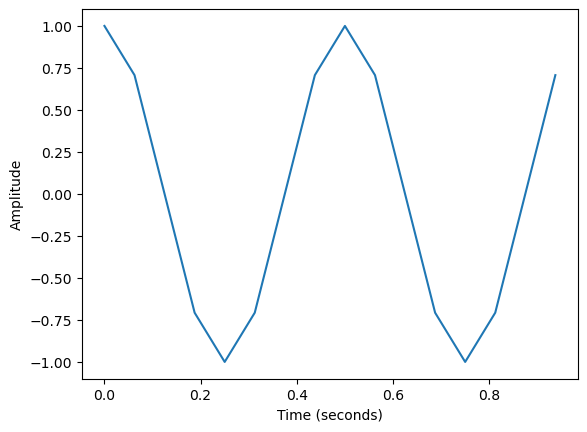

In [1]:
import matplotlib.pyplot as plt
import numpy as np

SAMPLE_RATE = 16
sig1_frequency = 2
sig1_length = sig1_frequency * 2 * np.pi
sig1 = np.cos(np.arange(0, sig1_length, sig1_length / SAMPLE_RATE))
plt.xlabel("Time (seconds)")
plt.ylabel("Amplitude")
plt.plot([i / SAMPLE_RATE for i in range(SAMPLE_RATE)], sig1)

Since the sampling rate is 16 Hz, we are taking 16 samples per second. We've captured our 2 Hz signal accurately, even though the reconstruction looks jagged. What happens if we try to plot a signal with a frequency of 2 + 16 = 18 Hz?

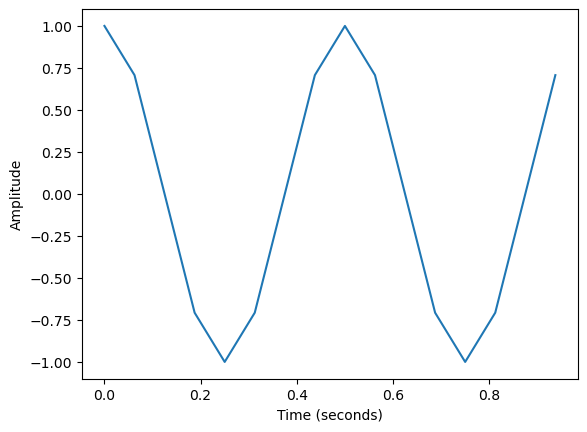

In [3]:
sig2_frequency = 18
sig2_length = sig2_frequency * 2 * np.pi
sig2 = np.cos(np.arange(0, sig2_length, sig2_length / SAMPLE_RATE))
plt.xlabel("Time (seconds)")
plt.ylabel("Amplitude")
plt.plot([i / SAMPLE_RATE for i in range(SAMPLE_RATE)], sig2)

We get the same reconstructed signal! The frequency 2 Hz is acting as an alias for the frequencies ..., -14, 2, 18, 34, 50, ... Hz. Try changing the frequency in the code block above to one of these other frequencies.